<div class="alert alert-block alert-success">
    <h1 style="margin-bottom:0.5cm;"><b>Parkinson CATBOOST Classification</b></h1>
    <p style="margin-bottom:0.25cm;"><b>Eduardo Saman</b><br></p>
<p><b>Introduction</b></p>
<p>The following script provides a comprehensive approach to classify Parkinson's disease patients from healthy individuals using machine learning techniques. The workflow involves several key steps:</p>
<ul>
    <li><b>Data Loading</b>: The script starts by loading the dataset containing features that are used to distinguish between Parkinson's patients and healthy controls.</li>
    <li><b>Preprocessing</b>: Preprocessing steps are crucial for preparing the data for analysis. This includes handling missing values, normalizing the data, and encoding categorical variables if necessary.</li>
    <li><b>Data Augmentation with RandomOverSampler</b>: To address the issue of class imbalance in the dataset, the script utilizes the RandomOverSampler technique. This method helps in balancing the dataset by oversampling the minority class, ensuring that the classifier does not become biased towards the majority class.</li>
    <li><b>Principal Component Analysis (PCA)</b>: PCA is applied to reduce the dimensionality of the dataset while retaining most of the variance. This step helps in improving the efficiency of the model and can also aid in visualizing the data more effectively.</li>
    <li><b>Classification using CatBoost</b>: Finally, the script employs the CatBoost algorithm, a state-of-the-art gradient boosting method that handles categorical features efficiently and is robust to overfitting. CatBoost is used to build a classifier that can accurately distinguish between Parkinson's disease patients and healthy individuals.</li>
</ul>
<p><b>Dataset Description</b></p>
<p>'This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy and 1 for PD.' </p>

<p>Source: <b> Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)</b></p>

<p><b>Contact: sammaneduardo@gmail.com</b></p>
</div>

In [103]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from catboost import CatBoostClassifier
from imblearn.over_sampling import RandomOverSampler


In [104]:
# Load dataset
df = pd.read_csv('/Users/eduardosamman/Desktop/Parkinson/Parkinsson disease.csv')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [106]:
# Data Preprocessing (Augmentation)
x = df.drop(['status', 'name'], axis=1)
y = df['status']
random_oversampler = RandomOverSampler(random_state=42)
x_resampled, y_resampled = random_oversampler.fit_resample(x, y)
augmented_df = pd.concat([pd.DataFrame(x_resampled, columns=x.columns), pd.DataFrame(y_resampled, columns=['status'])], axis=1)

print("Dataframe BEFORE augmentation:", x.shape)
print("Distribution of samples:")
print(df['status'].value_counts())
print("__________________________________________")
print("Dataframe AFTER augmentation:", x_resampled.shape)
print("Distribution of samples:")
print(augmented_df['status'].value_counts())


Dataframe BEFORE augmentation: (195, 22)
Distribution of samples:
1    147
0     48
Name: status, dtype: int64
__________________________________________
Dataframe AFTER augmentation: (294, 22)
Distribution of samples:
1    147
0    147
Name: status, dtype: int64


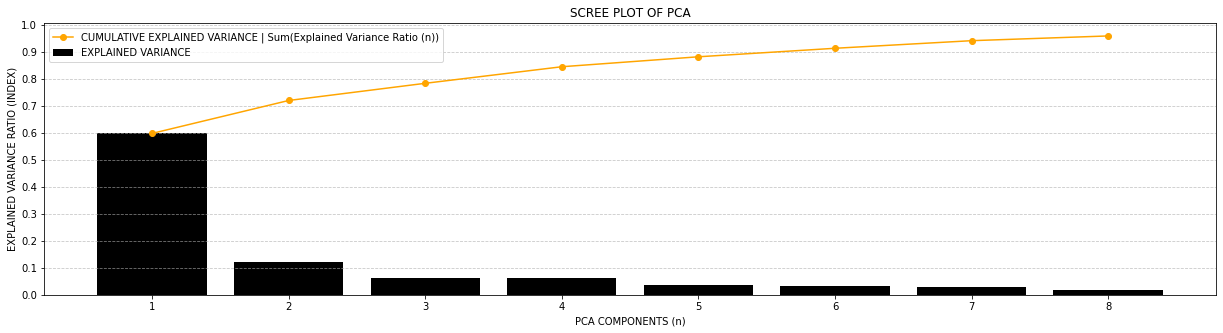

In [107]:
# Data Augmentation and Principal Component Analysis
features = augmented_df.drop('status', axis=1)
target = augmented_df['status']
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)
pca = PCA(n_components=0.95)
features_pca = pca.fit_transform(features_scaled)

# Scree plot of PCA
plt.figure(figsize=(21, 5))
plt.bar(np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, color='black', label='EXPLAINED VARIANCE')
plt.plot(np.arange(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', color='orange', linestyle='-', label='CUMULATIVE EXPLAINED VARIANCE | Sum(Explained Variance Ratio (n))')
plt.title('SCREE PLOT OF PCA')
plt.xlabel('PCA COMPONENTS (n)')
plt.ylabel('EXPLAINED VARIANCE RATIO (INDEX)')
plt.xticks(np.arange(1, pca.n_components_ + 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


### CATBOOSTING ALGORITHM
CatBoost is a machine learning algorithm that is specifically designed to work well with categorical features in the data. It is a gradient boosting algorithm that can be used for both classification and regression tasks.

The name "CatBoost" is derived from "Cat" for categorical features and "Boost" for gradient boosting. It is known for its ability to handle categorical variables without the need for extensive preprocessing, such as one-hot encoding or label encoding. CatBoost uses a combination of ordered boosting, random permutations, and gradient-based optimization to handle categorical features effectively. It automatically handles categorical variables by applying an algorithm called "Ordered Target Encoding," which assigns numerical values to each category based on the target variable's mean value.

Output:

- Scores: 
- Area Under the ROC Curve (AUC): 
- SD of AUS: 


In [137]:
# Model Training and Evaluation
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='Logloss', verbose=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, features_pca, target, cv=kf, scoring='roc_auc')
print("Scores of cross-validation:")
print("____________________________________________________")
print("Parkinsonian Score:          ", scores[2])
print("Healthy Score:               ", scores[4])
print("Average AUC:                 ", scores.mean())
print("Standard deviation of AUC:   ", scores.std())
accuracy_catboost = scores.mean()

Scores of cross-validation:
____________________________________________________
Parkinsonian Score:           0.9965437788018433
Healthy Score:                0.9774078478002379
Average AUC:                  0.9947903253204163
Standard deviation of AUC:    0.008793716559593236


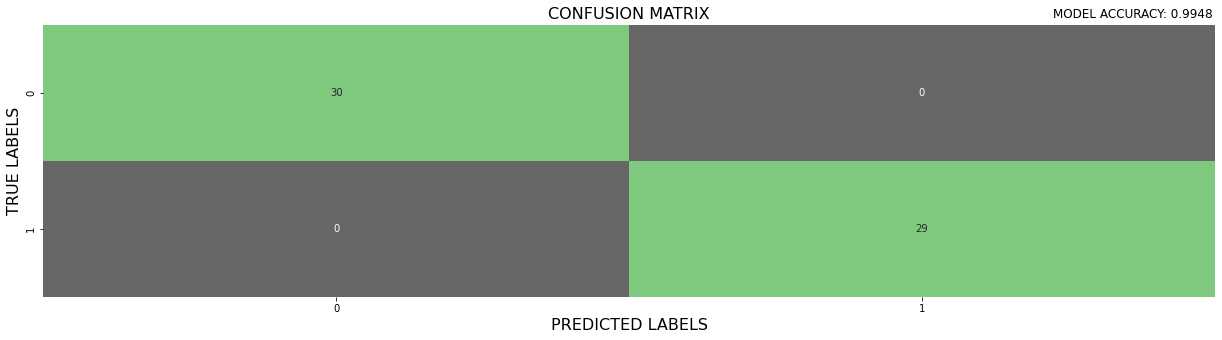

In [138]:
# Testing of the model
X_train, X_test, y_train, y_test = train_test_split(features_pca, target, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix
plt.figure(figsize=(21, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Accent_r', cbar=False)
plt.title('CONFUSION MATRIX', fontsize=16)
plt.xlabel('PREDICTED LABELS', fontsize=16)
plt.ylabel('TRUE LABELS', fontsize=16)
plt.text(0.93, 1.04, 'MODEL ACCURACY: ' + str(round(accuracy_catboost, 4)), fontsize=12, ha='center', va='center', transform=plt.gca().transAxes, color = 'Black')
plt.show()

In [ ]:
# Classifty the new data
new_data_path = 'data_disease.csv'
new_data = pd.read_csv(new_data_path)
predictions = model.predict(new_data)
print("Predictions for New Data:", predictions)